# Fashion MNIST PCA T-SNE

source utilisée : https://www.kaggle.com/dualphase/t-sne

In [1]:
import numpy as np
import seaborn as sns
import matplotlib
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [2]:
data = pd.read_csv('fashionmnist/fashion-mnist_train.csv')

In [3]:
data.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
X = data.loc[:,"pixel1":"pixel784"]
y = data.label

In [5]:
data.shape

(60000, 785)

In [6]:
pca = PCA(n_components = 30)
X_pca = pca.fit_transform(data)

In [9]:
tsne = TSNE()
X_tsne = tsne.fit_transform(X_pca[:1000])  

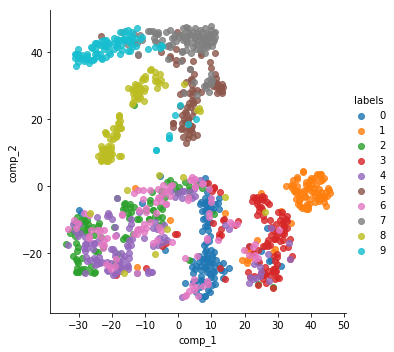

In [11]:
matplotlib.rcParams['figure.figsize'] = (10.0, 10.0)
proj = pd.DataFrame(X_tsne)
proj.columns = ["comp_1", "comp_2"]
proj["labels"] = y
sns.lmplot("comp_1", "comp_2", hue = "labels", data = proj.sample(1000) ,fit_reg=False)